# Loan Application Status Prediction

### Import Libraries

In [1]:
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('../datasets/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In the dataset there are both types of columns numeric and categorical. Target column is also categorical here with binary values.

### Project Description

Above dataset includes details of applicants who have applied for loan. The dataset includes Independent Variables: Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area

Loan_Status is the target column having binary values for loan should be approved or not on the basis of the details provided in the dataset. Hence, this is a classification problem.

In [3]:
#Checking the dataset shape
df.shape

(614, 13)

Dataset is having 614 rows and 13 columns (12 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Columns names are displayed where 'Loan_Status' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here, we can see columns are of type object,integer and float i.e. both categorical and numeric columns are there.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It gives schema information regarding the dataset like RangeIndex, Data columns, datatypes. We can see there are null values in the dataset.

### Data Preprocessing

In [7]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Loan_ID
Unique values :  614
Value counts  :  LP002626    1
LP002784    1
LP002447    1
LP002524    1
LP002602    1
           ..
LP002444    1
LP001990    1
LP002544    1
LP002236    1
LP001024    1
Name: Loan_ID, Length: 614, dtype: int64
----------------------
Gender
Unique values :  2
Value counts  :  Male      489
Female    112
Name: Gender, dtype: int64
----------------------
Married
Unique values :  2
Value counts  :  Yes    398
No     213
Name: Married, dtype: int64
----------------------
Dependents
Unique values :  4
Value counts  :  0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------
Education
Unique values :  2
Value counts  :  Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------
Self_Employed
Unique values :  2
Value counts  :  No     500
Yes     82
Name: Self_Employed, dtype: int64
----------------------
ApplicantIncome
Unique values :  505
Value counts  :  2500    9
6000    6
2600    6
4583 

We have total number of rows as 614 and column 'Loan_ID' has 614 unique values means it will not contribute in model learning or performance hence we can either drop this columnor make it as index. Gender has 2 unique values with 'Male' in majority. 'CoapplicantIncome' has a high count with value 0.0 as compared to others hence it is having skewness. Target column 'Loan_Status' has a huge difference in Y and N value_counts, hence class imbalance is required here.

In [8]:
# Dropping Loan_ID column
df.drop('Loan_ID',axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### EDA and Visualisations 

In [9]:
# Checking for null values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Columns : Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History are having null values.

<AxesSubplot:>

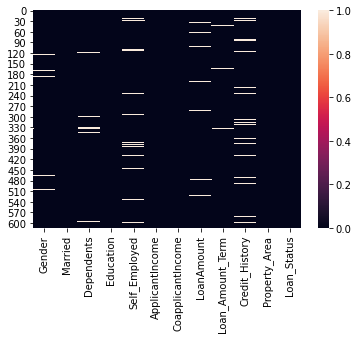

In [10]:
# Visualising null values
sns.heatmap(df.isnull())

Heatmap showing the presence of multiple NaN values in multiple columns.

In [11]:
df[df['Married'].isnull().values]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


'Married' column has total 3 nulls and for these rows 'Dependents' are also missing. We can either drop or replace these nulls with mode of the column. Remaining columns require replacing of NaN values.

2.677551679256059

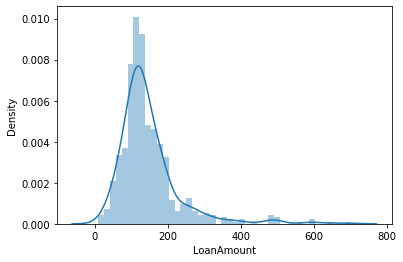

In [12]:
sns.distplot(df['LoanAmount'])
df['LoanAmount'].skew()

Column 'LoanAmount' is not normally distributed hence we will replace the NaN values with the median.

-2.362414124216269

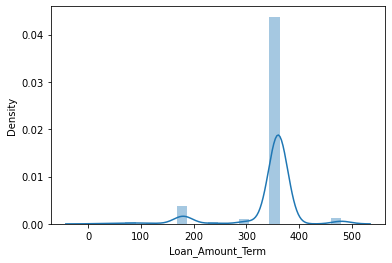

In [13]:
sns.distplot(df['Loan_Amount_Term'])
df['Loan_Amount_Term'].skew()

Column 'Loan_Amount_Term' is not normally distributed hence we will replace the NaN values with the median.

-1.8823610612186696

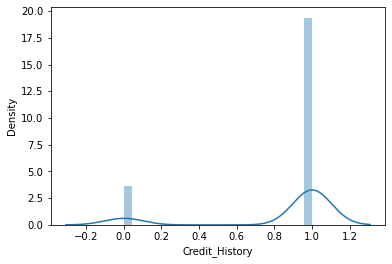

In [14]:
sns.distplot(df['Credit_History'])
df['Credit_History'].skew()

Column 'Credit_History' is not normally distributed hence we will replace the NaN values with the median.

In [15]:
# Treating null values by filling null values except Married column
df['Gender'].fillna('Male',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

In [16]:
# Checking the null values after treatment
df.isnull().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Nulls are removed from all the columns other than 'Married', let's treat this columns' null values.

In [17]:
df=df[pd.notnull(df['Married'])]

# Checking the null values after treatment
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

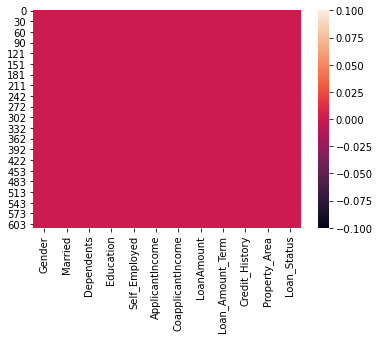

In [18]:
# Visualizing nulls
sns.heatmap(df.isnull())

We have treated all the null values in dataset.

In [19]:
# Checking the dataset
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Our dataset is now having 611 rows and 12 columns with no null values.

In [20]:
# Checking for the duplicates
df[df.duplicated()==True].count()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no duplicate rows in the dataset.

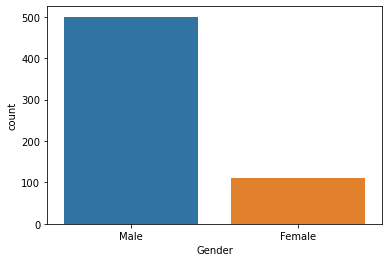

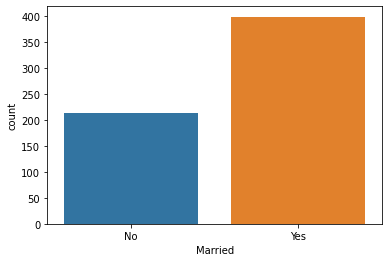

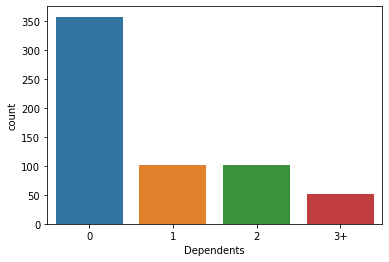

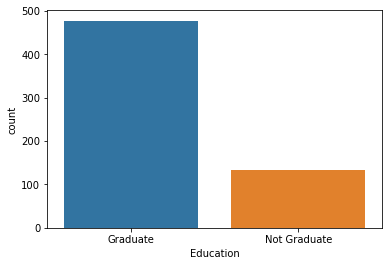

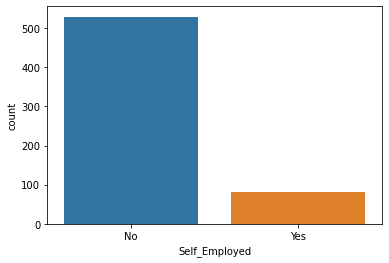

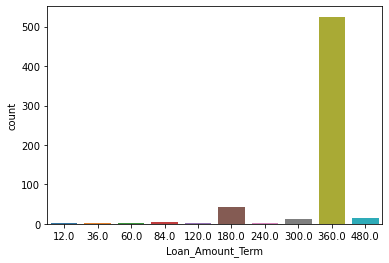

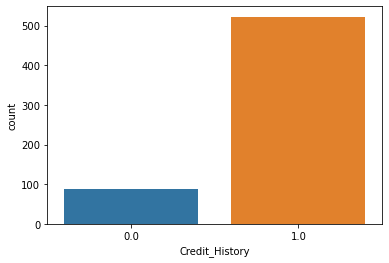

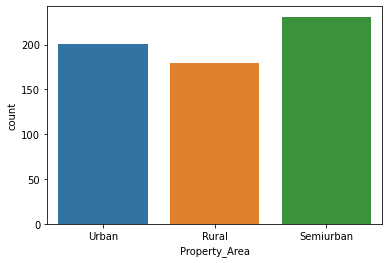

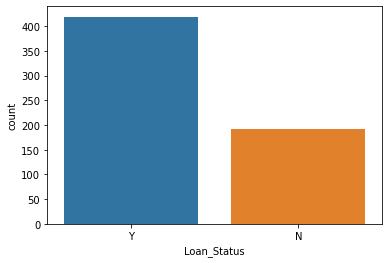

In [21]:
# Count plot for analysis
for i in df.columns :
    if len(df[i].value_counts())<15 :
        sns.countplot(df[i])
        plt.show()

Above count plot is depicting that Males applicants are very high in number as compared to female applicants.
More applications are of Married people. Applicants with 0 dependent are highest in number. Graduates have applied mostly for the loan. More applications are from the ones who are not Self_Employed. Loan_Amount_Term as 360.0 is highest. Credil_History 1.0 is in majority. Highest load applicatnts Property_Area is Semiurban. Loan_Status approved is double in count than of not approved.

In [22]:
# Describe dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,5399.513912,1627.972046,145.738134,342.324059,0.854337
std,6120.764249,2931.747971,84.307304,64.208419,0.353057
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,128.000000,360.000000,1.000000
75%,5790.000000,2304.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


ApplicantIncome is from 150 to 81000. CoapplicantIncome is from 0 to 41667. LoanAmount is from 9 to 700. Loan_Amount_Term is from 12 to 480. 

Standard deviation is high for all the columns except Credit_History. 

ApplicantIncome,CoapplicantIncome,LoanAmount are right skewed (mean>median) and also the difference between 75% and max value is high hence outliers will be there. Loan_Amount_Term is left skewed (mean<median) and difference between 75% and max value is not much but still outliers could be there. No skewness in Credit_History. 

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

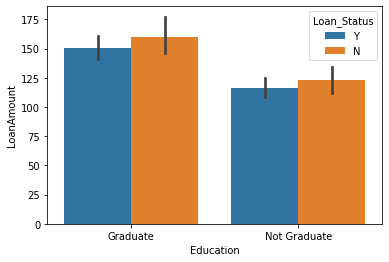

In [23]:
sns.barplot(x='Education',y='LoanAmount',data=df, hue='Loan_Status')

Loan_Status approved and not approved both are more for Graduates than for Non-Gratuates and LoanAmount is also high for Graduates than Non Graduates.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

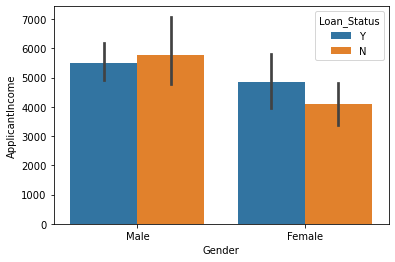

In [24]:
sns.barplot(x='Gender',y='ApplicantIncome',data=df, hue='Loan_Status')

Loan_Status approved and not approved both are more for Males who also have high income than Females.

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

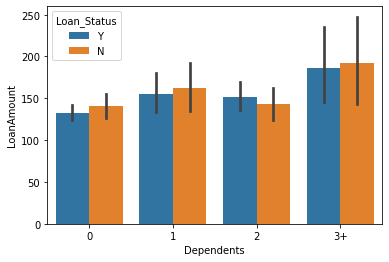

In [25]:
sns.barplot(x='Dependents',y='LoanAmount',data=df, hue='Loan_Status')

Majority of applicants with Approved and not approved Loan_Status are with 3+ dependents and also have highest LoanAmount.

In [26]:
# Pivot table showing counts
pd.crosstab(df['Gender'],df['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,82,19,7,3
Male,275,83,94,48


There are more dependents with Male applicants than Female applicants.

In [27]:
# Pivot table showing counts
pd.crosstab(df['Loan_Status'],df['Credit_History'])

Credit_History,0.0,1.0
Loan_Status,,
N,82,110
Y,7,412


Credit_History as 1.0 has high chances of loan approval.

In [28]:
pd.crosstab(df['Property_Area'],df['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Property_Area,,,,,,,,,,
Rural,0,0,0,2,0,11,0,4,160,2
Semiurban,0,2,0,1,2,10,1,6,203,6
Urban,1,0,2,1,1,23,2,3,162,6


Loan_Amount_Term 360.0 is highly referre by all the Property_Area. Next preferred term is 180.0

In [29]:
pd.crosstab(df['Self_Employed'],df['Education'])

Education,Graduate,Not Graduate
Self_Employed,,
No,412,117
Yes,65,17


High number of allicants are Graduates but not Self_Employed.

{'bodies': [<matplotlib.collections.PolyCollection at 0x22a9e032df0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x22a9e032c10>,
 'cmins': <matplotlib.collections.LineCollection at 0x22a9e0432e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x22a9e0435e0>}

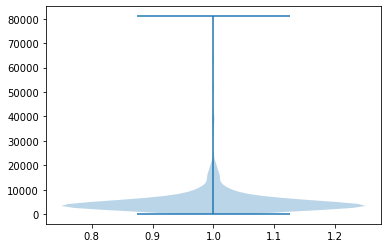

In [30]:
#violinplot
plt.violinplot(df['ApplicantIncome'])

Most of the applicants income lies within 10k and very few have above that comparatively.

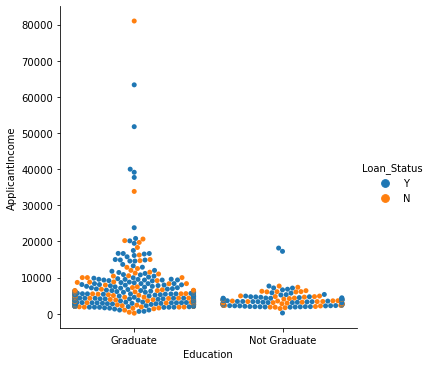

In [31]:
# Swarmplot
sns.catplot('Education','ApplicantIncome',data=df,kind='swarm',hue='Loan_Status')

Here, plot is showing Graduates are more who have aplied for Loan and Graduates are earning more than Not graduates. Loan Status doen't seem to have any dependency on Applicant Income and Education as well.

In [32]:
# Dividing the data in categorical and numeric columns
# Categorical data
df_cat=df.select_dtypes(include='object')
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [33]:
# Continuous data
df_con=df.select_dtypes(exclude='object')
df_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [35]:
# Checking outliers
from scipy.stats import zscore
z=np.abs(zscore(df_con))
np.where(z>3)

(array([  9,  14,  68,  94, 125, 129, 132, 154, 154, 170, 170, 176, 176,
        182, 184, 240, 260, 276, 306, 311, 331, 331, 367, 400, 407, 415,
        430, 440, 484, 492, 494, 503, 520, 522, 543, 558, 572, 578, 582,
        597, 601], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [36]:
# Checking the outlier in the dataset
z[9][1]

3.1884325230591535

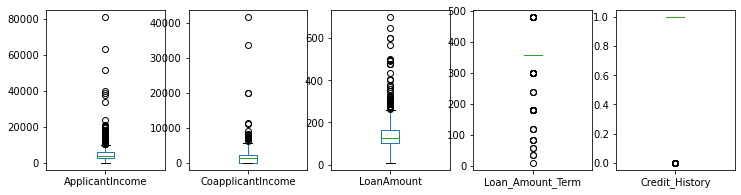

In [37]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Plot showing there are presence of outliers in the columns.

In [38]:
# Checking skewness
df_con.skew()

ApplicantIncome      6.535346
CoapplicantIncome    7.479901
LoanAmount           2.737522
Loan_Amount_Term    -2.444382
Credit_History      -2.013844
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

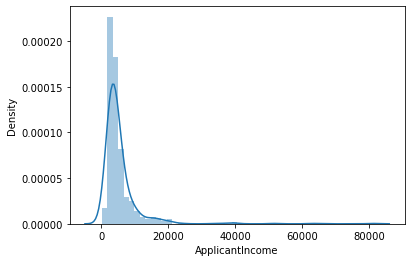

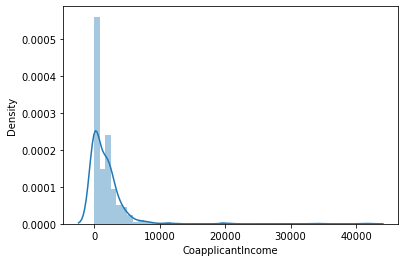

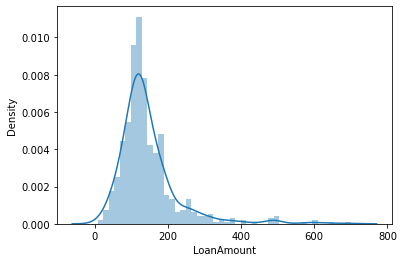

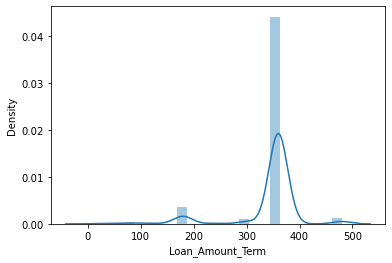

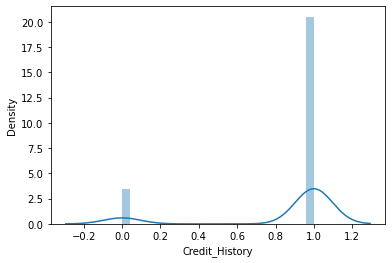

In [39]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

Data is skewed in all the columns.

### Data Cleaning


In [40]:
# Removing outliers

df1=df_con.copy()
df1=df_con[(z<3).all(axis=1)]
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [41]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (611, 5)
Shape of dataset after removing outliers :  (574, 5)


In [42]:
# Percentage Data lost
data_percent=(611-574)/611*100
data_percent

6.055646481178396

Approx 6% data is lost after removing the outliers.

In [43]:
# Checking skewness after removing outliers
df1.skew()

ApplicantIncome      2.159707
CoapplicantIncome    1.344041
LoanAmount           1.153126
Loan_Amount_Term    -2.163753
Credit_History      -1.967452
dtype: float64

We can still see skewness in all the columns.

In [44]:
# Removing skewness
df2=df1.copy()
for i in df2.columns :
    df2[i]=np.log(df1[i]+1)
print(df2.skew())

ApplicantIncome     -0.204074
CoapplicantIncome   -0.221883
LoanAmount          -0.662920
Loan_Amount_Term    -2.776563
Credit_History      -1.967452
dtype: float64


Removed skewness and skewness is increasing on further applying any transformations. Hence we consider the present values as skewness threshold based on the kind of data distribution in respective columns.

In [45]:
# Checking the new dataset
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,8.674197,0.000000,4.859812,5.888878,0.693147
1,8.430327,7.319202,4.859812,5.888878,0.693147
2,8.006701,0.000000,4.204693,5.888878,0.693147
3,7.857094,7.765993,4.795791,5.888878,0.693147
4,8.699681,0.000000,4.955827,5.888878,0.693147
...,...,...,...,...,...
609,7.972811,0.000000,4.276666,5.888878,0.693147
610,8.320448,0.000000,3.713572,5.198497,0.693147
611,8.996280,5.484797,5.537334,5.888878,0.693147
612,8.933796,0.000000,5.236442,5.888878,0.693147


### Apply encoding on categorical columns

In [46]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

Gender
['Male' 'Female']
Married
['No' 'Yes']
Dependents
['0' '1' '2' '3+']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
Property_Area
['Urban' 'Rural' 'Semiurban']
Loan_Status
['Y' 'N']


In [47]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
df_cat_enc=df_cat.copy()
le=LabelEncoder()
for i in df_cat_enc.columns :
    df_cat_enc[i]=le.fit_transform(df_cat[i])
df_cat_enc

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


Categorical columns with object datatypes are now encoded having 611 rows and 7 columns.

### Combining numerical and categorical data for further analysis

In [48]:
dff=pd.concat([df2,df_cat_enc],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

Combined all the columns and removed nulls

In [49]:
# Checking shape of new dataset
dff.shape

(574, 12)

### EDA and Visualizations on whole dataset

In [51]:
# Describng the dataset
dff.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,8.290369,4.335762,4.830431,5.840153,0.589296,0.815331,0.648084,0.722997,0.228223,0.127178,1.029617,0.688153
std,0.555068,3.839419,0.424762,0.187460,0.247600,0.388367,0.477985,0.996465,0.420053,0.333463,0.790979,0.463652
min,5.017280,0.000000,2.302585,5.198497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.940392,0.000000,4.615121,5.888878,0.693147,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.229778,7.147528,4.859812,5.888878,0.693147,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,8.617172,7.720794,5.081404,5.888878,0.693147,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,9.936342,9.102867,5.942799,6.175867,0.693147,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000


In above table, mean and median are almost similar hence could not see skewness and also the difference of 75 percentle and max value is not much hence no outliers are present in the dataset. Standard deviation is not high for any of the columns. Therefore, all details seem good.

In [52]:
# Checking correlation
dff.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
ApplicantIncome,1.000000,-0.360339,0.405789,-0.056030,0.026142,0.066606,-0.028825,0.109165,-0.173381,0.209280,-0.010341,-0.003996
CoapplicantIncome,-0.360339,1.000000,0.201025,0.003681,0.009305,0.233035,0.342862,0.005309,0.053295,-0.090827,-0.074111,0.083697
LoanAmount,0.405789,0.201025,1.000000,0.058867,-0.012667,0.176813,0.184851,0.129296,-0.112107,0.114146,-0.107901,-0.020142
Loan_Amount_Term,-0.056030,0.003681,0.058867,1.000000,0.037019,-0.113871,-0.123803,-0.087864,-0.098948,-0.023573,-0.066607,-0.006555
Credit_History,0.026142,0.009305,-0.012667,0.037019,1.000000,0.014070,0.017736,-0.018741,-0.074122,-0.015570,-0.008974,0.560384
Gender,0.066606,0.233035,0.176813,-0.113871,0.014070,1.000000,0.382604,0.187770,0.044842,-0.006996,-0.027614,0.018844
Married,-0.028825,0.342862,0.184851,-0.123803,0.017736,0.382604,1.000000,0.333601,0.026955,-0.014345,0.009152,0.086678
Dependents,0.109165,0.005309,0.129296,-0.087864,-0.018741,0.187770,0.333601,1.000000,0.067910,0.043179,0.003784,0.020460
Education,-0.173381,0.053295,-0.112107,-0.098948,-0.074122,0.044842,0.026955,0.067910,1.000000,-0.008227,-0.067653,-0.090935
Self_Employed,0.209280,-0.090827,0.114146,-0.023573,-0.015570,-0.006996,-0.014345,0.043179,-0.008227,1.000000,-0.027538,-0.025230


<AxesSubplot:>

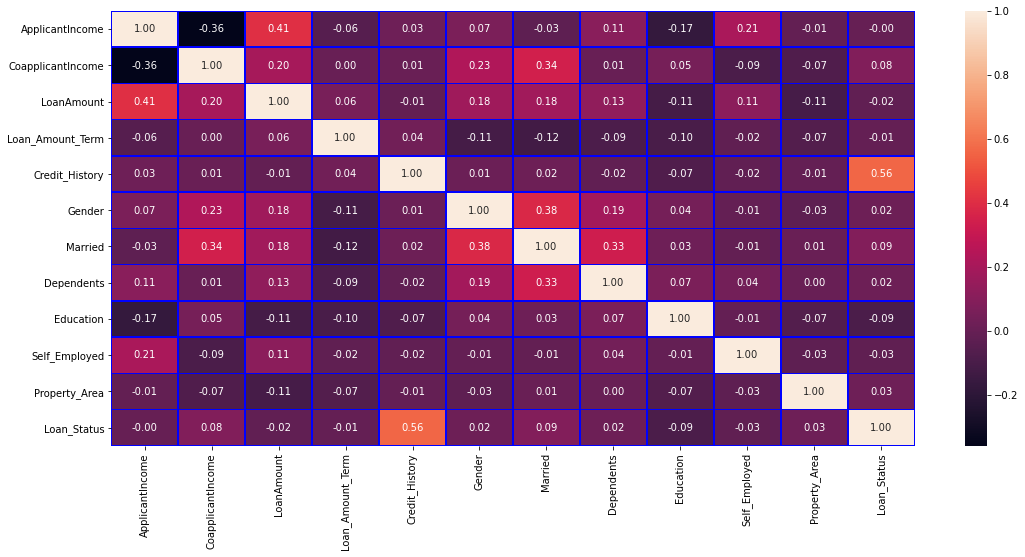

In [53]:
# Visualizing correlation
plt.figure(figsize=(18,8))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Target 'Loan_Status' is highly positively correlated with 'Credit_History' and least correlation with 'ApplicantIncome'. 'Dependents' have a good correlation with 'Married'. 'Married' has good correlation with 'CoapplicantIncome' & 'Gender'. 'ApplicantIncome' has good correlation with 'Loan_Amount' and 'CoapplicantIncome'.

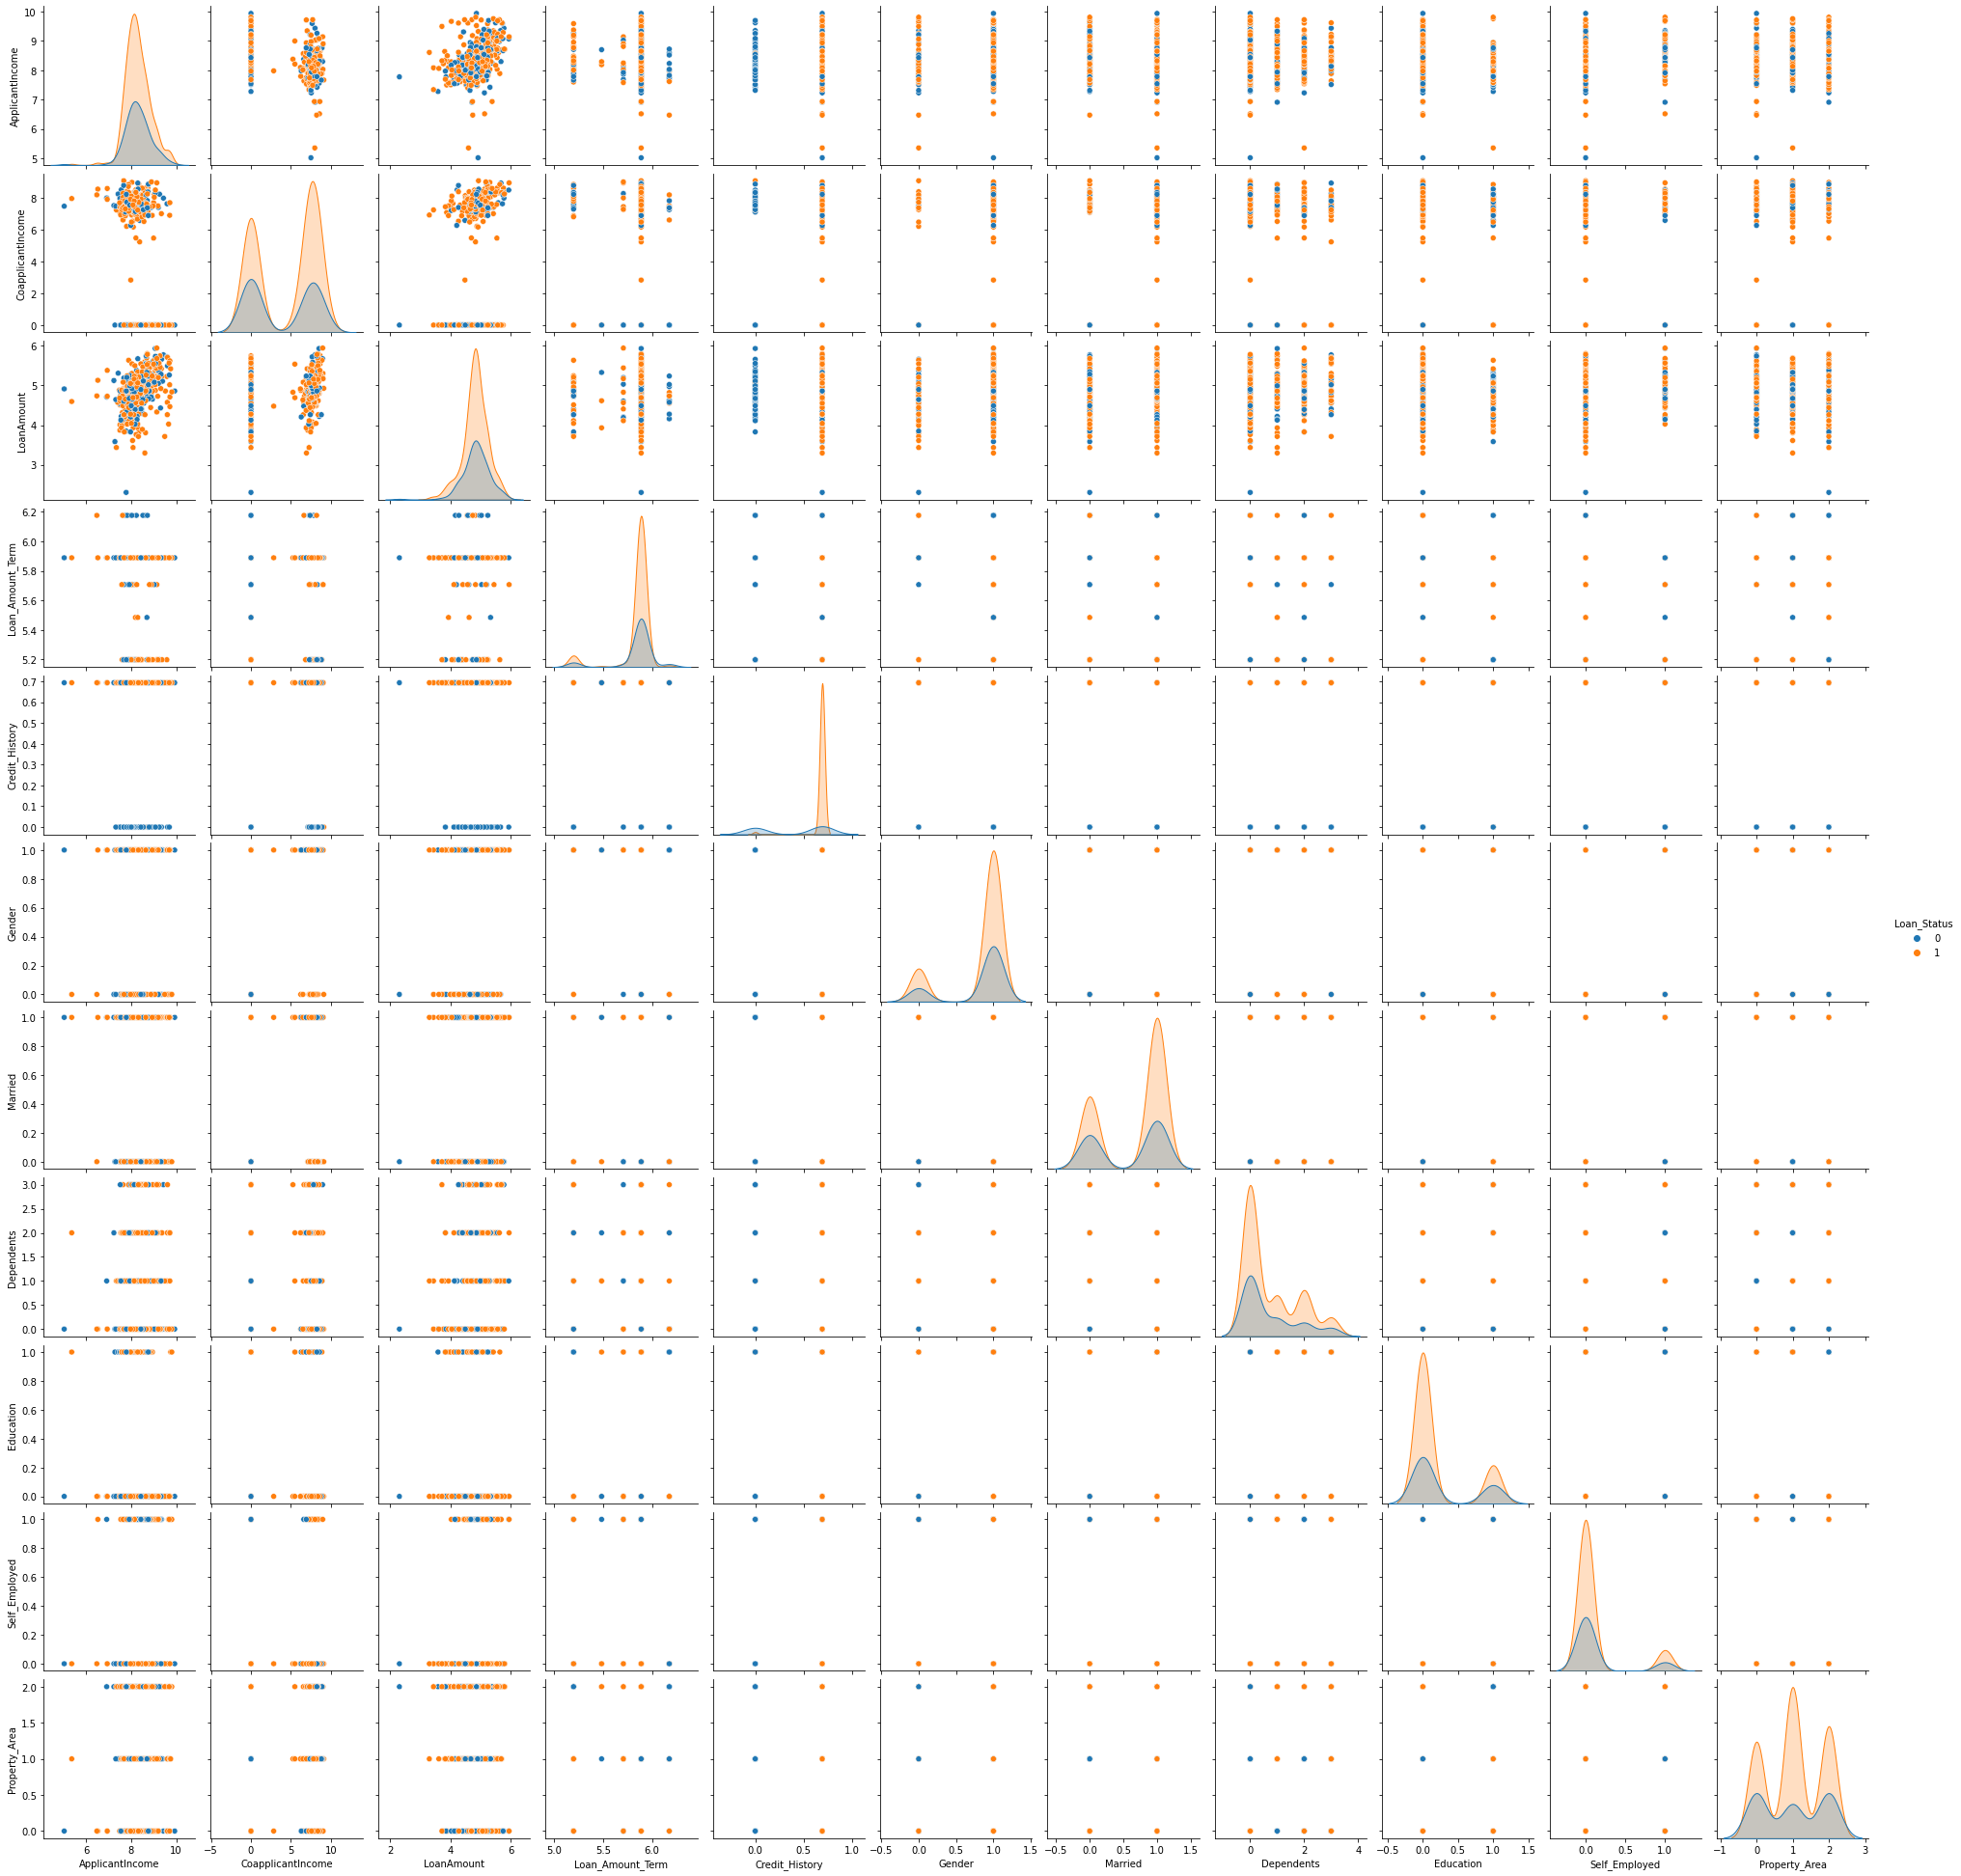

In [106]:
#pairplot
sns.pairplot(dff,hue='Loan_Status')

Pairplot showing relationship of each column with one another.

### Dividing dataset in x and y

In [54]:
x=dff.drop('Loan_Status',axis=1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,8.674197,0.000000,4.859812,5.888878,0.693147,1,0,0,0,0,2
1,8.430327,7.319202,4.859812,5.888878,0.693147,1,1,1,0,0,0
2,8.006701,0.000000,4.204693,5.888878,0.693147,1,1,0,0,1,2
3,7.857094,7.765993,4.795791,5.888878,0.693147,1,1,0,1,0,2
4,8.699681,0.000000,4.955827,5.888878,0.693147,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,5.888878,0.693147,0,0,0,0,0,0
610,8.320448,0.000000,3.713572,5.198497,0.693147,1,1,3,0,0,0
611,8.996280,5.484797,5.537334,5.888878,0.693147,1,1,1,0,0,2
612,8.933796,0.000000,5.236442,5.888878,0.693147,1,1,2,0,0,2


In [55]:
y=dff['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 574, dtype: int32

In [56]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (574, 11)
Shape of y :  (574,)


### Multicollinearity with VIF

In [57]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,ApplicantIncome,307.791365
1,CoapplicantIncome,3.496729
2,LoanAmount,194.912696
3,Loan_Amount_Term,235.811484
4,Credit_History,6.739945
5,Gender,6.648269
6,Married,4.048508
7,Dependents,1.789162
8,Education,1.332432
9,Self_Employed,1.199744


In [59]:
# Drop PerformanceRating and check Multicollinearity again
x1=x.drop('ApplicantIncome',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,CoapplicantIncome,2.767975
1,LoanAmount,137.089116
2,Loan_Amount_Term,136.627066
3,Credit_History,6.716290
4,Gender,6.540625
5,Married,4.046484
6,Dependents,1.785920
7,Education,1.327709
8,Self_Employed,1.179908
9,Property_Area,2.720760


In [60]:
x1=x1.drop('LoanAmount',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,CoapplicantIncome,2.711751
1,Loan_Amount_Term,13.873349
2,Credit_History,6.714733
3,Gender,6.423921
4,Married,4.015328
5,Dependents,1.768206
6,Education,1.313544
7,Self_Employed,1.158128
8,Property_Area,2.709420


In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x1)
x2=pd.DataFrame(xs,columns=x1.columns)
x2

,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,-1.130261,0.260149,0.419797,0.475916,-1.357050,-0.726194,-0.543793,-0.381718,1.227882
1,0.777733,0.260149,0.419797,0.475916,0.736893,0.278229,-0.543793,-0.381718,-1.302834
2,-1.130261,0.260149,0.419797,0.475916,0.736893,-0.726194,-0.543793,2.619735,1.227882
3,0.894204,0.260149,0.419797,0.475916,0.736893,-0.726194,1.838934,-0.381718,1.227882
4,-1.130261,0.260149,0.419797,0.475916,-1.357050,-0.726194,-0.543793,-0.381718,1.227882
...,...,...,...,...,...,...,...,...,...
569,-1.130261,0.260149,0.419797,-2.101213,-1.357050,-0.726194,-0.543793,-0.381718,-1.302834
570,-1.130261,-3.425880,0.419797,0.475916,0.736893,2.287074,-0.543793,-0.381718,-1.302834
571,0.299534,0.260149,0.419797,0.475916,0.736893,0.278229,-0.543793,-0.381718,1.227882
572,-1.130261,0.260149,0.419797,0.475916,0.736893,1.282651,-0.543793,-0.381718,1.227882


Our dataset is now scaled and ready to feed into the model.

### Find best random state for Train-Test Split

In [62]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    if round(acctrain,2)==round(acctest,2) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Best random state :  0  Accuracy(Training) :  81.79551122194513  Accuracy(Testing) :  81.5028901734104
Best random state :  7  Accuracy(Training) :  81.54613466334165  Accuracy(Testing) :  82.08092485549133
Best random state :  8  Accuracy(Training) :  81.54613466334165  Accuracy(Testing) :  82.08092485549133
Best random state :  9  Accuracy(Training) :  81.79551122194513  Accuracy(Testing) :  81.5028901734104
Best random state :  12  Accuracy(Training) :  81.54613466334165  Accuracy(Testing) :  82.08092485549133
Best random state :  19  Accuracy(Training) :  81.79551122194513  Accuracy(Testing) :  81.5028901734104
Best random state :  20  Accuracy(Training) :  81.54613466334165  Accuracy(Testing) :  82.08092485549133
Best random state :  21  Accuracy(Training) :  81.79551122194513  Accuracy(Testing) :  81.5028901734104
Best random state :  22  Accuracy(Training) :  81.79551122194513  Accuracy(Testing) :  81.5028901734104
Best random state :  24  Accuracy(Training) :  81.79551122194513

Here, training & testing accuracies are almost same for random state=82. So, lets take 82 as our best random state.

In [64]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=82)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(401, 9)
(173, 9)
(401,)
(173,)


In [65]:
y_train.value_counts()

1    266
0    135
Name: Loan_Status, dtype: int64

### Class Imbalance

In [66]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
trainx,trainy=sm.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [67]:
trainy.value_counts()

0    266
1    266
Name: Loan_Status, dtype: int64

### Finding the best algorithm

In [68]:
# Making instance of classifiers
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
xg=GradientBoostingClassifier()

In [69]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtc,knn,rf,xg]
for i in algo_list :
    print(i)
    i.fit(trainx,trainy)
    predtrain=i.predict(trainx)
    predtest=i.predict(x_test)
    acctrain=accuracy_score(trainy,predtrain)
    acctest=accuracy_score(y_test,predtest)
    err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

LogisticRegression()
Accuracy(Training) :  69.73684210526315  Accuracy(Test)  83.8150289017341  Mean absolute error :  0.16184971098265896
[[ 25  19]
 [  9 120]]
              precision    recall  f1-score   support

           0       0.74      0.57      0.64        44
           1       0.86      0.93      0.90       129

    accuracy                           0.84       173
   macro avg       0.80      0.75      0.77       173
weighted avg       0.83      0.84      0.83       173



DecisionTreeClassifier()
Accuracy(Training) :  94.73684210526315  Accuracy(Test)  69.36416184971098  Mean absolute error :  0.3063583815028902
[[27 17]
 [36 93]]
              precision    recall  f1-score   support

           0       0.43      0.61      0.50        44
           1       0.85      0.72      0.78       129

    accuracy                           0.69       173
   macro avg       0.64      0.67      0.64       173
weighted avg       0.74      0.69      0.71       173



KNeighborsClassifi

LogisticRegression has the highest accuracy but let's go for cross validation for all the models used.

In [83]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x2,y,cv=5).mean()*100)

CV mean of  LogisticRegression()  is  81.71167048054919
CV mean of  DecisionTreeClassifier()  is  70.19374523264685
CV mean of  KNeighborsClassifier()  is  79.6186117467582
CV mean of  RandomForestClassifier()  is  76.12662090007628
CV mean of  GradientBoostingClassifier()  is  79.27231121281466


Looking at difference of accuracy and cv mean, opting for LogisticRegression as our best model with accuracy of 84%, also having second least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [71]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':['l1','l2','elasticnet','none'],
              'class_weight':['balanced',None],
              'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'multi_class':['auto','ovr','multinomial']}
              #'verbose':[0,1,2,3,4,5],
              #'n_estimators':[10,50,100]}

lr=LogisticRegression()
GCV=GridSearchCV(lr,parameters,cv=5)
GCV.fit(trainx,trainy)
GCV.best_params_

{'class_weight': 'balanced',
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [94]:
lr=LogisticRegression(class_weight='balanced',multi_class='auto',penalty='l1',solver='liblinear')
lr.fit(trainx,trainy)
pred=lr.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(lr,x2,y,cv=57).mean()

print('Accuracy : ',acc*100,' CV mean : ',cv*100)

Accuracy :  83.23699421965318  CV mean :  79.80861244019138


Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

#### We are getting model accuracy as 83% and cv mean as approx 80 for the parameter set used, this shows our model is performing good.

### AUC-ROC Curve

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr=LogisticRegression(class_weight='balanced',multi_class='auto',penalty='l1',solver='liblinear')
lr.fit(trainx,trainy)
pred=lr.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. RandomForestClassifier()

In [97]:
pred_proba=xg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
#print(fpr,tpr,thresholds)

Calculating fpr,tpr,thresholds for selected model

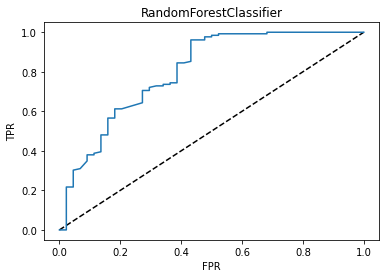

In [98]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show()

In [99]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc1)
print('ROC_AUC score : ',auc_score)

Accuracy :  0.8323699421965318
ROC_AUC score :  0.8029422128259338


Getting good accuracy score and AUC-ROC score for the model selected

### Saving the model

In [100]:
# Saved the model in .pkl file
import pickle #import joblib
file='loan_status.pkl'
pickle.dump(lr,open(file,'wb'))

### Conclusion

In [101]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8323699421965318

In [102]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(173, 9)
(173,)


In [103]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion

,Orignal,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,0
...,...,...
168,0,1
169,1,1
170,1,1
171,1,1
